In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data=pd.read_csv("salry.csv")

In [3]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
Oe=OrdinalEncoder()
new_data=Oe.fit_transform(data[['Gender']])

In [5]:
data[["Gender"]]=new_data

In [6]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1.0,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0.0,PhD,Director of Marketing,20.0,200000.0
6700,32.0,1.0,High School,Sales Associate,3.0,50000.0
6701,30.0,0.0,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,1.0,Master's Degree,Marketing Manager,14.0,140000.0


In [7]:
Oe_data=Oe.fit_transform(data[['Education Level']])
Oe_data_1=Oe.fit_transform(data[['Job Title']])

In [8]:
data[['Education Level']]=Oe_data
data[['Job Title']]=Oe_data_1

In [9]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,0.0,177.0,5.0,90000.0
1,28.0,0.0,3.0,18.0,3.0,65000.0
2,45.0,1.0,5.0,145.0,15.0,150000.0
3,36.0,0.0,0.0,116.0,7.0,60000.0
4,52.0,1.0,3.0,26.0,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0.0,5.0,34.0,20.0,200000.0
6700,32.0,1.0,2.0,116.0,3.0,50000.0
6701,30.0,0.0,1.0,42.0,4.0,55000.0
6702,46.0,1.0,4.0,97.0,14.0,140000.0


In [10]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Gender'].fillna(data['Gender'].median(), inplace=True)
data['Education Level'].fillna(data['Education Level'].median(), inplace=True)
data['Job Title'].fillna(data['Job Title'].median(), inplace=True)
data['Job Title'].fillna(data['Job Title'].median(), inplace=True)
data['Years of Experience'].fillna(data['Years of Experience'].median(), inplace=True)
data['Salary'].fillna(data['Salary'].median(), inplace=True)

C:\Users\Master\AppData\Local\Temp\ipykernel_5160\100461816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Master\AppData\Local\Temp\ipykernel_5160\100461816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
X=data.drop('Salary',axis=1)
y=data['Salary']

In [12]:
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1.0,0.0,177.0,5.0
1,28.0,0.0,3.0,18.0,3.0
2,45.0,1.0,5.0,145.0,15.0
3,36.0,0.0,0.0,116.0,7.0
4,52.0,1.0,3.0,26.0,20.0
...,...,...,...,...,...
6699,49.0,0.0,5.0,34.0,20.0
6700,32.0,1.0,2.0,116.0,3.0
6701,30.0,0.0,1.0,42.0,4.0
6702,46.0,1.0,4.0,97.0,14.0


In [13]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6704, dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6704 non-null   float64
 1   Gender               6704 non-null   float64
 2   Education Level      6704 non-null   float64
 3   Job Title            6704 non-null   float64
 4   Years of Experience  6704 non-null   float64
 5   Salary               6704 non-null   float64
dtypes: float64(6)
memory usage: 314.4 KB


In [15]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
lr_model=LinearRegression()

In [18]:
lr_model.fit(X,y)

LinearRegression()

In [19]:
y_pred=lr_model.predict(X_test)

In [20]:
y_pred

array([194498.99179597, 122280.3477252 ,  79478.23898709, ...,
       130057.35807844, 159793.75018096, 208896.36315939])

In [21]:
new_data=pd.DataFrame([[33, 0.0, 3.0, 18.0, 3.0]], 
                                columns=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'])

In [22]:
prediction=lr_model.predict(new_data)

In [23]:
prediction

array([70888.55723557])

In [24]:
mse=mean_squared_error(y_test,y_pred)
print('mean_squared_error:',mse)

mean_squared_error: 891856136.4216772


In [25]:
def scatter():
    plt.scatter(y_test,y_pred,color='blue',alpha=0.5)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.title('y_test Vs y_pred')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\Master\AppData\Local\Temp\ipykernel_5160\734297564.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


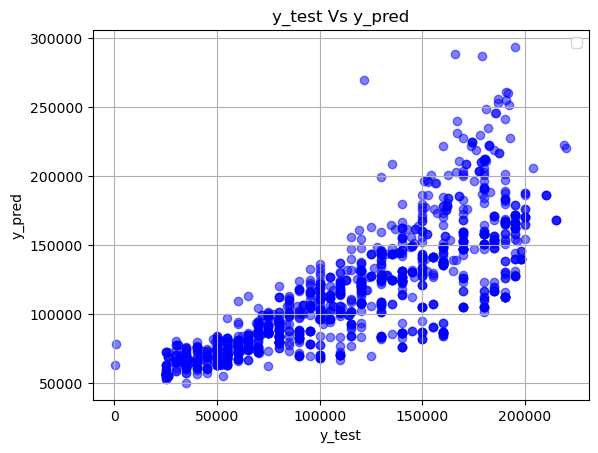

In [26]:
scatter()

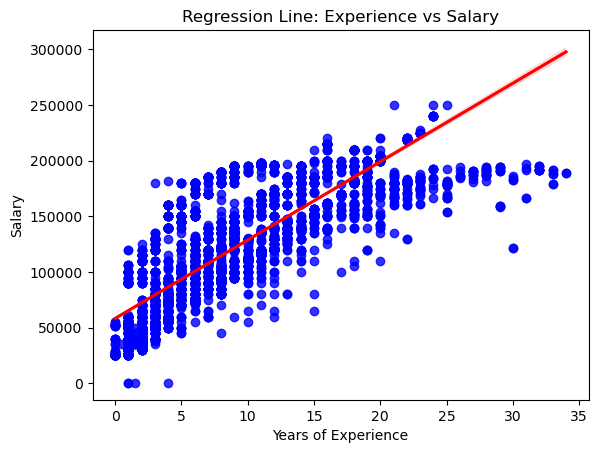

In [27]:
# Assuming X and y are your data
sns.regplot(x=X['Years of Experience'], y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Line: Experience vs Salary')
plt.show()

In [28]:
lr_model.coef_

array([-1899.28762654,  6091.00205694,  2260.7162692 ,   -27.51958193,
        8905.31321223])

In [29]:
lr_model.intercept_

100562.31294192081

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [60]:
print(X_train.iloc[0])
print(X_train_poly[0])

Age                     52.0
Gender                   0.0
Education Level          5.0
Job Title              178.0
Years of Experience     29.0
Name: 2922, dtype: float64
[1.00000000e+00 5.20000000e+01 0.00000000e+00 5.00000000e+00
 1.78000000e+02 2.90000000e+01 2.70400000e+03 0.00000000e+00
 2.60000000e+02 9.25600000e+03 1.50800000e+03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.50000000e+01
 8.90000000e+02 1.45000000e+02 3.16840000e+04 5.16200000e+03
 8.41000000e+02 1.40608000e+05 0.00000000e+00 1.35200000e+04
 4.81312000e+05 7.84160000e+04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.30000000e+03 4.62800000e+04
 7.54000000e+03 1.64756800e+06 2.68424000e+05 4.37320000e+04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.25000000e+02 4.45000000e+03
 7.25000000e+02 1.58420000e+05 2.58100000e+04 4.20500000e+03
 5.63975200e+06 9.18836000e+05 1.49

In [46]:
print(X_test,X_test_poly)
print(X_test_poly)

       Age  Gender  Education Level  Job Title  Years of Experience
2794  43.0     0.0              5.0      178.0                 19.0
2233  34.0     1.0              4.0        3.0                  8.0
5559  27.0     1.0              1.0      177.0                  3.0
6355  28.0     1.0              2.0      118.0                  2.0
263   31.0     0.0              0.0       73.0                  3.0
...    ...     ...              ...        ...                  ...
3193  23.0     0.0              1.0      177.0                  1.0
2157  46.0     1.0              5.0      178.0                 16.0
2202  34.0     1.0              4.0       44.0                  9.0
1801  46.0     1.0              5.0      159.0                 15.0
2836  45.0     0.0              1.0      159.0                 22.0

[1341 rows x 5 columns] [[1.00000000e+00 4.30000000e+01 0.00000000e+00 ... 2.17320556e+08
  2.31971380e+07 2.47609900e+06]
 [1.00000000e+00 3.40000000e+01 1.00000000e+00 ... 4.6080000

In [47]:
lr_model.fit(X_train_poly,y_train)

LinearRegression()

In [48]:
predict_model=lr_model.predict(X_train_poly)

In [49]:
predict_model

array([195410.04372172,  74393.69675959,  77328.39795536, ...,
        63581.57015688,  61622.02105262,  90824.93233903])

In [50]:
def scatter():
    plt.scatter(y_train, predict_model, color='blue', alpha=0.5)
    plt.xlabel('Actual Salary (y)')
    plt.ylabel('Predicted Salary (y_pred)')
    plt.title('Actual vs Predicted Salary')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ideal fit line
    plt.show()

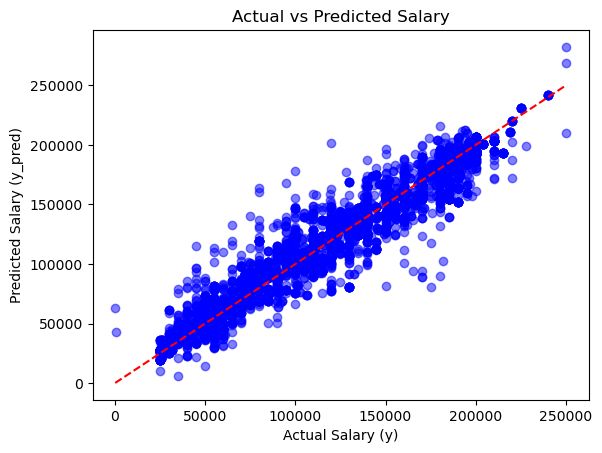

In [51]:
scatter()

In [52]:
print("RMSE:", mean_squared_error(y_train, predict_model, squared=False))

RMSE: 14717.437057590207


c:\Users\Master\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


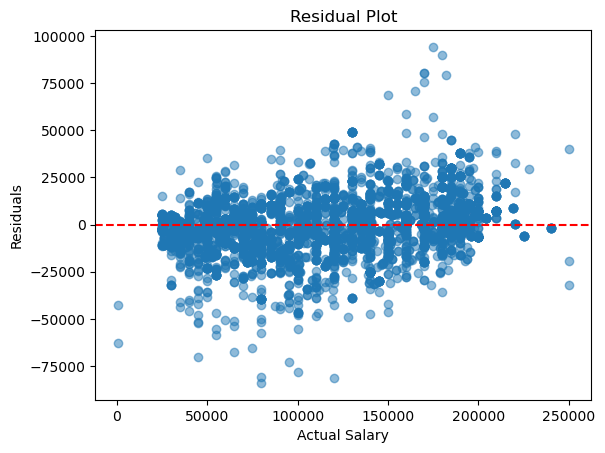

In [53]:
residuals = y_train - predict_model
plt.scatter(y_train, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, predict_model)
print("R² Score:", r2)

R² Score: 0.9229361626140427


In [62]:
y_train

2922    194778.0
4941     85000.0
135      55000.0
2306     50000.0
3433    115000.0
          ...   
3772    130000.0
5191     55000.0
5226     60000.0
5390     65000.0
860      90000.0
Name: Salary, Length: 5363, dtype: float64

In [63]:
X_test_poly

array([[1.00000000e+00, 4.30000000e+01, 0.00000000e+00, ...,
        2.17320556e+08, 2.31971380e+07, 2.47609900e+06],
       [1.00000000e+00, 3.40000000e+01, 1.00000000e+00, ...,
        4.60800000e+03, 1.22880000e+04, 3.27680000e+04],
       [1.00000000e+00, 2.70000000e+01, 1.00000000e+00, ...,
        8.45883000e+05, 1.43370000e+04, 2.43000000e+02],
       ...,
       [1.00000000e+00, 3.40000000e+01, 1.00000000e+00, ...,
        1.41134400e+06, 2.88684000e+05, 5.90490000e+04],
       [1.00000000e+00, 4.60000000e+01, 1.00000000e+00, ...,
        8.53233750e+07, 8.04937500e+06, 7.59375000e+05],
       [1.00000000e+00, 4.50000000e+01, 0.00000000e+00, ...,
        2.69192088e+08, 3.72467040e+07, 5.15363200e+06]])

In [65]:
new_data = np.array([[30, 1, 4, 105, 5]])
new_data_poly = poly.transform(new_data)
predicted_salary = lr_model.predict(new_data_poly)
print(f"Predicted Salary: {predicted_salary[0]}")

Predicted Salary: 94804.33102545515


c:\Users\Master\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [71]:
y_train_pred = lr_model.predict(X_train_poly)
r2 = r2_score(y_train, y_train_pred)
print("Training R² Score:", r2)


Training R² Score: 0.9229361626140427


C:\Users\Master\AppData\Local\Temp\ipykernel_5160\2809804970.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # perfect line


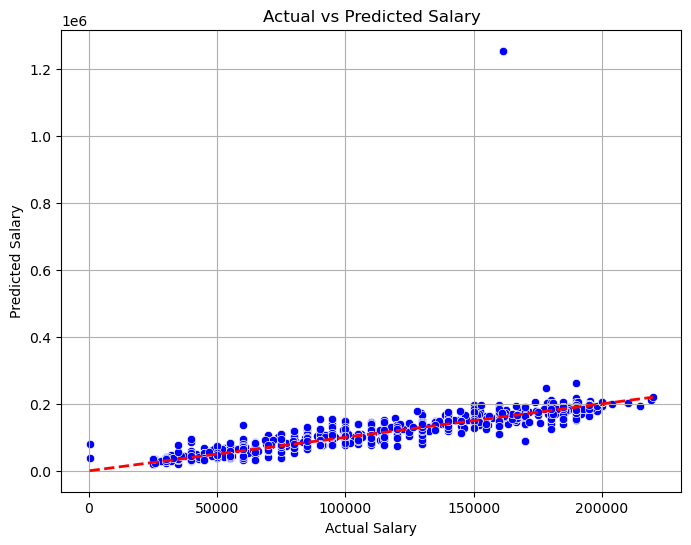

In [72]:
y_test_pred =lr_model.predict(X_test_poly)

# Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')  # perfect line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()